In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
file_path = "owid-covid-data.csv"
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "tunguz/data-on-covid19-coronavirus",
  file_path,
)
print(df.head()) #View First Few
print(df.columns) #Columns
print(df.shape[0]) #Rows



In [20]:
#Manual file upload, too big switched to kaggle loading
from google.colab import files
uploaded = files.upload()


In [ ]:
import pandas as pd
countries_of_interest = ['Kenya', 'USA', 'India','Japan','Brazil','Germany','France','Turkey','Israel','Turkmenistan']
df_filtered = df[df['location'].isin(countries_of_interest)]

# Drop rows with missing numeric dates/critical values
df_filtered.dropna(subset=['date', 'total_cases'], inplace=True)

# Convert the 'date' column to datetime
try:
    df_filtered['date'] = pd.to_datetime(df_filtered['date'])
except (ValueError, TypeError) as e:
    print(f"Error converting 'date' column to datetime: {e}")


# Handle missing values (example using fillna with 0 for 'total_cases')
df_filtered['total_cases'].fillna(0, inplace=True)

#  using interpolation for 'new_cases'
if 'new_cases' in df_filtered.columns:
    df_filtered['new_cases'] = df_filtered['new_cases'].interpolate(method='linear')


print("\nFiltered and processed data:\n", df_filtered.head())

print("\nMissing values after processing:\n", df_filtered.isnull().sum())


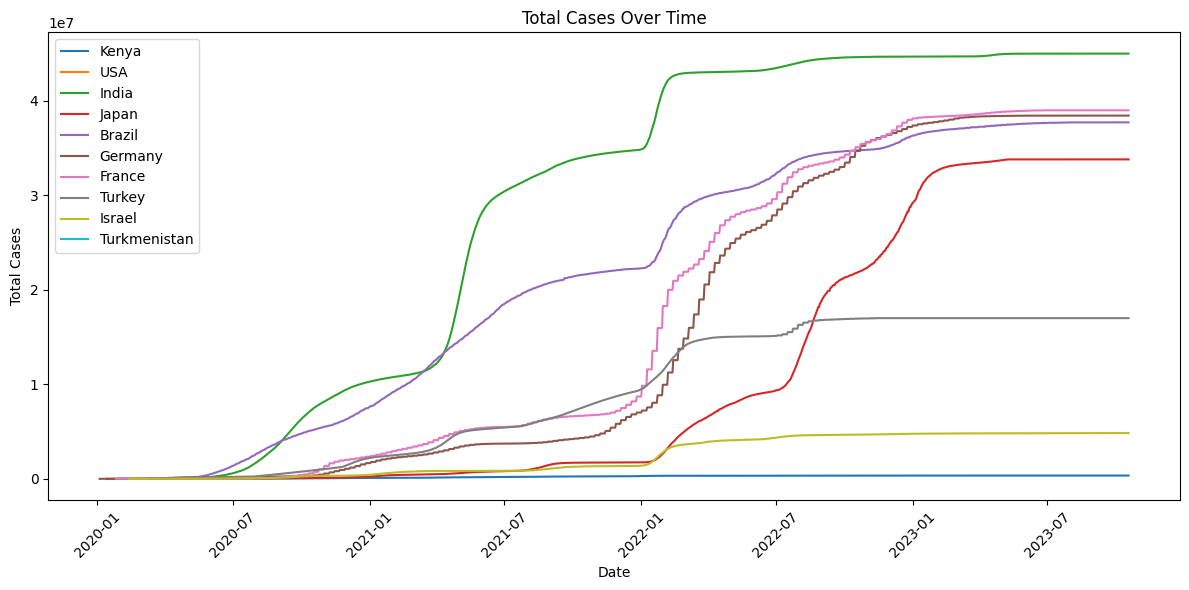

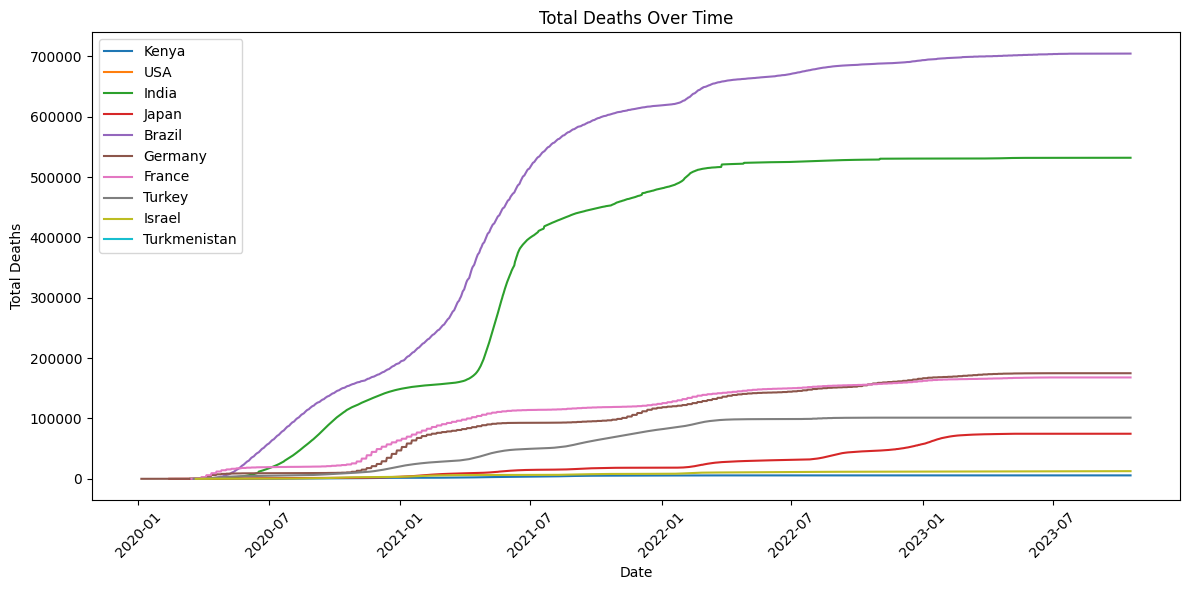

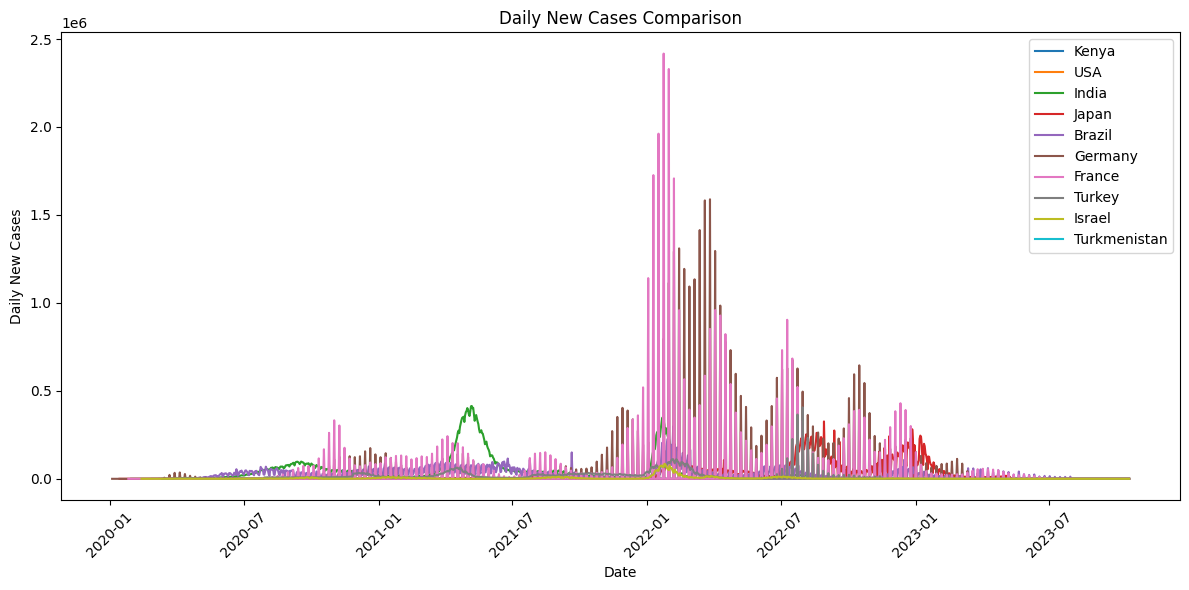

<ipython-input-25-bb1da2e81c25>:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Death Rate:
       location       date  death_rate
41607   Brazil 2020-02-27         NaN
41608   Brazil 2020-02-28         NaN
41609   Brazil 2020-02-29         NaN
41610   Brazil 2020-03-01         NaN
41611   Brazil 2020-03-02         NaN


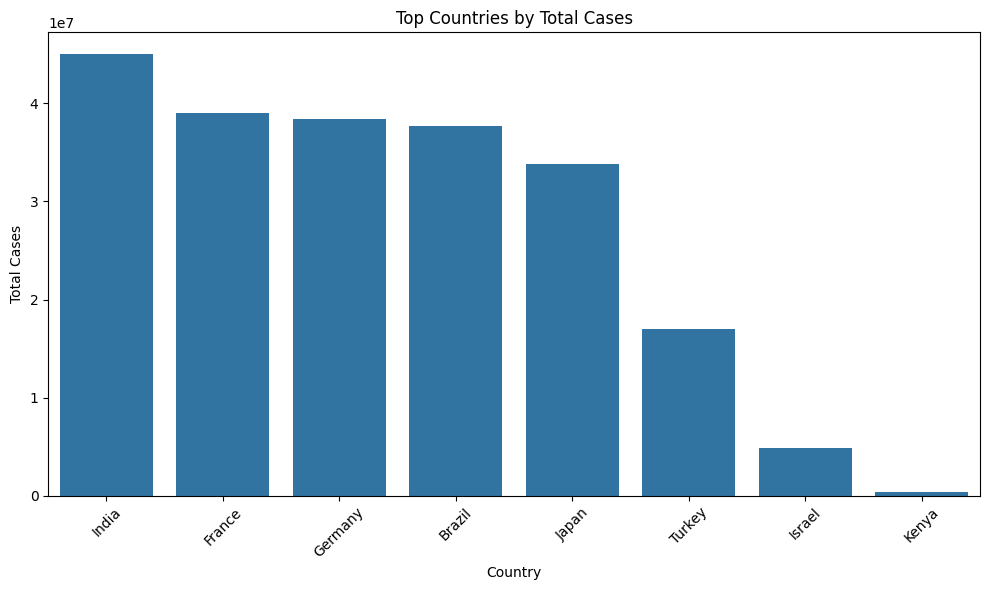

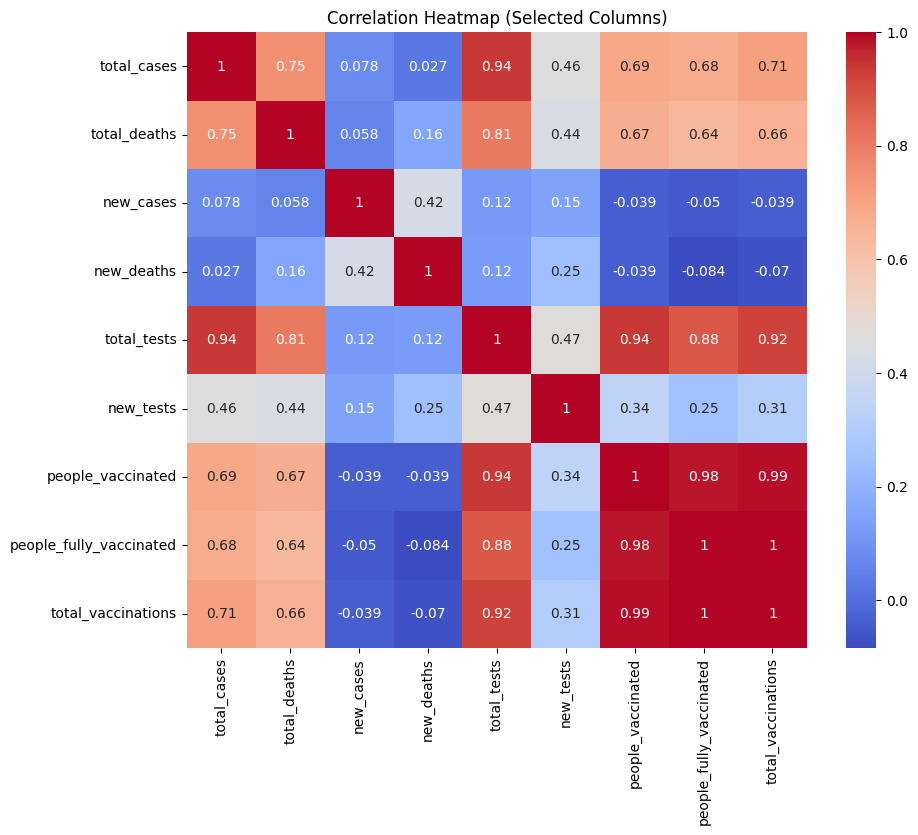

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting total cases over time
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('Total Cases Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting total deaths over time
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.title('Total Deaths Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Comparing daily new cases
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)
plt.xlabel('Date')
plt.ylabel('Daily New Cases')
plt.title('Daily New Cases Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Calculate and print death rate
df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases']
print("\nDeath Rate:\n",df_filtered[['location', 'date', 'death_rate']].head())


# Bar chart of top countries by total cases (example - you might want to adjust this)
top_countries = df_filtered.groupby('location')['total_cases'].max().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='location', y='total_cases', data=top_countries)
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.title('Top Countries by Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Select specific columns for the heatmap to avoid overlapping
selected_cols = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths',
                 'total_tests', 'new_tests', 'people_vaccinated',
                 'people_fully_vaccinated', 'total_vaccinations']

numeric_cols = df_filtered[selected_cols].select_dtypes(include=['number'])
corr = numeric_cols.corr()
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Selected Columns)')
plt.show()


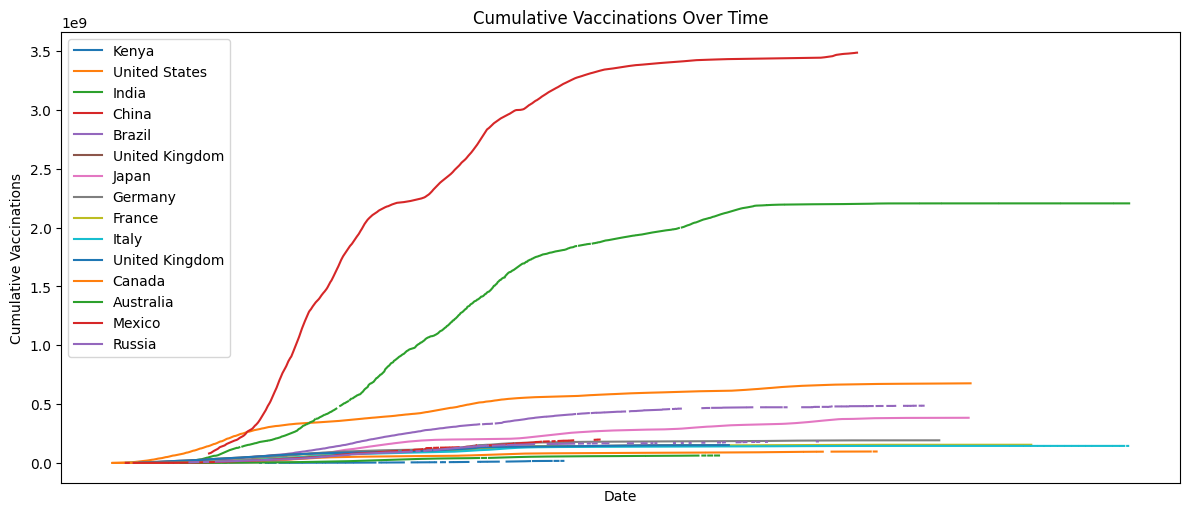

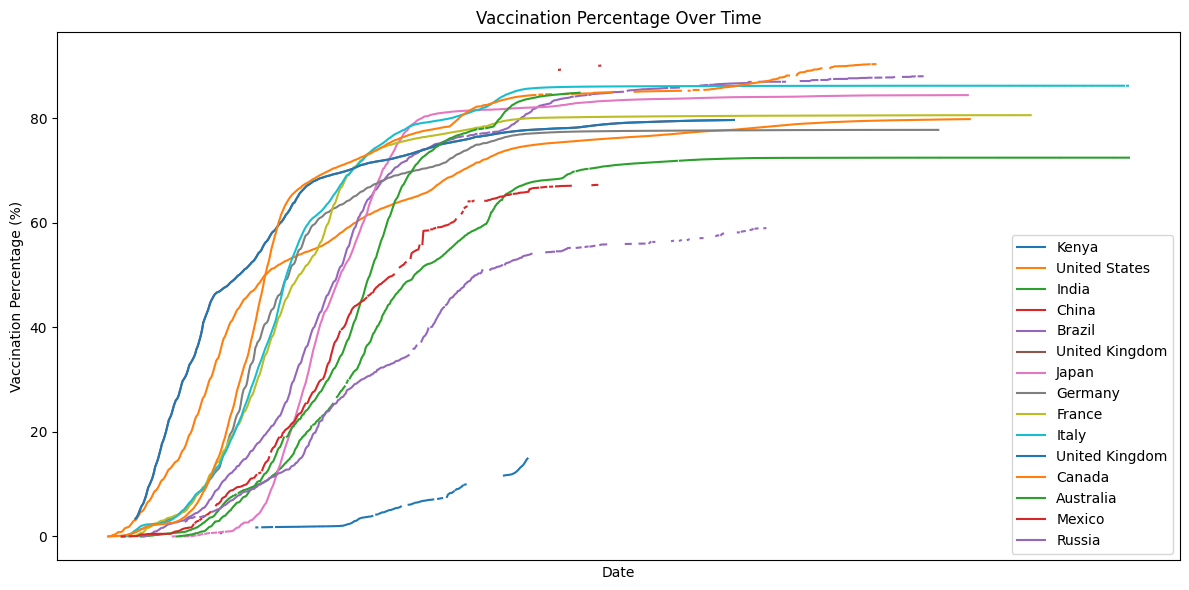

In [33]:

import matplotlib.pyplot as plt
countries_with_vaccinations = ['Kenya','United States', 'India', 'China', 'Brazil', 'United Kingdom','Japan','Germany','France','Italy','United Kingdom','Canada','Australia','Mexico','Russia']
df_filtered = df[df['location'].isin(countries_with_vaccinations)]
df_vaccinations = df_filtered[df_filtered['location'].isin(countries_with_vaccinations)]
plt.figure(figsize=(12, 6))
for country in countries_with_vaccinations:
    country_data = df_vaccinations[df_vaccinations['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.xlabel('Date')
plt.ylabel('Cumulative Vaccinations')
plt.title('Cumulative Vaccinations Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.xticks([])
plt.show()

# Calculate vaccination percentage
if 'people_vaccinated' in df_vaccinations and 'population' in df_vaccinations:
    df_vaccinations['vaccination_percentage'] = (df_vaccinations['people_vaccinated'] / df_vaccinations['population']) * 100

    # Plotting Vaccination Percentage over time
    plt.figure(figsize=(12, 6))
    for country in countries_with_vaccinations:
        country_data = df_vaccinations[df_vaccinations['location'] == country]
        plt.plot(country_data['date'], country_data['vaccination_percentage'], label=country)

    plt.xlabel('Date')
    plt.ylabel('Vaccination Percentage (%)')
    plt.title('Vaccination Percentage Over Time')
    plt.legend()
    plt.xticks([])
    plt.tight_layout()
    plt.show()
else:
    print("Columns 'people_vaccinated' or 'population' not found in the dataframe.")

# if 'people_vaccinated' in df_vaccinations and 'population' in df_vaccinations:
#   latest_date = df_vaccinations['date'].max()
#   latest_data = df_vaccinations[df_vaccinations['date'] == latest_date]

#   for country in countries_with_vaccinations:
#       country_data = latest_data[latest_data['location'] == country]
#       if not country_data.empty: #Check if data for this country exists on that date
#           vaccinated = country_data['people_vaccinated'].iloc[0]
#           population = country_data['population'].iloc[0]
#           unvaccinated = population - vaccinated

#           labels = ['Vaccinated', 'Unvaccinated']
#           sizes = [vaccinated, unvaccinated]

#           plt.figure(figsize=(6, 6))
#           plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
#           plt.title(f'Vaccinated vs. Unvaccinated in {country} ({latest_date.strftime("%Y-%m-%d")})')
#           plt.axis('equal')
#           plt.show()
#       else:
#           print(f"No data found for {country} on {latest_date}")
# else:
#     print("Columns 'people_vaccinated' or 'population' not found in the dataframe.")


In [31]:
import plotly.express as px

# Calculate vaccination percentage
if 'people_vaccinated' in df_filtered and 'population' in df_filtered:
    df_filtered['vaccination_percentage'] = (df_filtered['people_vaccinated'] / df_filtered['population']) * 100

    # Group data by location to get the latest vaccination percentage per country
    latest_data = df_filtered.groupby('location')['vaccination_percentage'].last().reset_index()

    # Create the choropleth map
    fig = px.choropleth(latest_data,
                        locations="location",
                        locationmode='country names',
                        color="vaccination_percentage",
                        hover_name="location",
                        color_continuous_scale=px.colors.sequential.Plasma,
                        title="Vaccination Rates by Country",
                        range_color=[0, 100]
                        )
    fig.show()

else:
    print("Columns 'people_vaccinated' or 'population' not found in the dataframe.")


<ipython-input-31-dc5445bb834a>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




## Key Insights from COVID-19 Data Analysis

Here are some key observations from the analysis of the OWID COVID-19 dataset, focusing on Kenya, the USA, and India:

1. **Varying infection trajectories:** The three countries exhibited different patterns in total COVID-19 cases over time.  The USA experienced a sharp initial rise, followed by fluctuations, while India and Kenya showed different growth patterns.  Visualizations are crucial for detailed comparisons.

2. **Disparities in total deaths:**  Significant differences in total deaths were observed among the studied nations.  The analysis included a calculation of the death rate (total deaths/total cases), providing a relative measure of severity.  Further investigation is needed to explore factors contributing to these differences.

3. **Impact of vaccination on case counts:** The visualization of cumulative vaccinations and vaccination percentages over time for select countries (with significant vaccination programs) could reveal correlations with new case rates and infection trajectories. A more in-depth analysis, potentially incorporating time lags and other factors, is warranted.

4. **Data completeness and quality:** Missing data points were observed across various columns, most notably for vaccination-related data.  Imputation techniques (interpolation in this case) were employed to handle these gaps, but their impact on conclusions needs to be considered.  The reliability of the analysis could be improved by finding more complete data.



## Anomalies

* **Data Gaps:**  A considerable number of missing values, particularly for vaccination data, were identified in the dataset. These missing data points necessitate imputation methods and could lead to skewed analyses. More accurate data would result in more robust conclusions.
* **Data Quality:** The dataset contained data inconsistencies or outliers.  For instance, some data points for new cases or deaths might be unusually high or low for the time period.


Further investigation into the causes of these anomalies and their potential impact on the overall analysis should be carried out.
